---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [3]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [4]:
def answer_one():
    
    df = pd.read_csv('fraud_data.csv')
    number_of_data_points = df.size
    number_of_not_fraud_class = df[df['Class'] == 0].size
    number_of_fraud_class = df[df['Class'] == 1].size
    fraud_frequency = (number_of_fraud_class/number_of_data_points)
    return fraud_frequency

In [5]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [6]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score, recall_score
    
    # Create a majority dummy classifier, and fit the training data
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    # Get the set of predicted values (single number y values) of input values (n-feature x vectors of the test set) 
    y_predicted_values = dummy_majority.predict(X_test)
    
    # Use the function with calculates the score of the accuracy evaluation metric on predicted y values and true y values.
    dummy_accuracy_score = accuracy_score(y_test, y_predicted_values)
    
    # Use the function with calculates the score of the recall evaluation metric on predicted y values and true y values.
    dummy_recall_score = recall_score(y_test, y_predicted_values)
    return (dummy_accuracy_score, dummy_recall_score)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [7]:
def answer_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC
    
    # create and train svc classifier
    svc = SVC().fit(X_train, y_train)
    # get the predicted values of test set from svc
    y_predicted = svc.predict(X_test)
    
    # get the evaluation metric scores for accuracy, recall, precision
    svc_accuracy_score = accuracy_score(y_test, y_predicted)
    svc_recall_score = recall_score(y_test, y_predicted)
    svc_precision_score = precision_score(y_test, y_predicted)
    return (svc_accuracy_score, svc_recall_score, svc_precision_score)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [8]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # create and train svc classifier, with a threshold of -220
    svc = SVC(C = 1e9, gamma= 1e-07).fit(X_train, y_train)
    # get predicted y values
    y_predicted = svc.predict(X_test)
    
    # Transform the set of predicted y values based on decision threshold = -220. So Any prediction with decision score less than
    # -220 is re-classified to the negative class (the 0 class), and predictions above -220 are re-classified to the positive
    # class
    y_decision_threshold_scores = svc.decision_function(X_test)   
    y_predicted_transformed_by_threshold = []
    for x in y_decision_threshold_scores:
        if (x <= -220):
            y_predicted_transformed_by_threshold.append(0)
        else:
            y_predicted_transformed_by_threshold.append(1)
    y_predicted_transformed_by_threshold = np.asarray(y_predicted_transformed_by_threshold, dtype=int)
    
    # get confusion matrix with decision threshold of -220
    confusion = confusion_matrix(y_test, y_predicted_transformed_by_threshold)
    
    return confusion

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [9]:
def answer_five():
        
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve
    
    # Create and fit the logistic regression model
    logistic_regression_model = LogisticRegression().fit(X_train, y_train)
    
    # Get probablitiy predictions of the logistic model on the test set
    y_predict_proba = logistic_regression_model.predict_proba(X_test)

    # Create precision-recall curve using y_test and the probablity estimates for X_test.
    #[ Alternatively, I can create the precision-recall curve using y_test and decision threshold scores of the model 
    # predictions (note: This is the standard way of constructing precision-recall curves):
    #y_decision_threshold_scores = logistic_regression_model.decision_function(X_test)
    #precision, recall, thresholds = precision_recall_curve(y_test, y_decision_threshold_scores) ]

    (precision, recall, thresholds) = precision_recall_curve(y_test, y_predict_proba[:,1]) 
                                                # The index = 1 for y_predict_proba Gives me the probability estimates of the 
                                                # model for class = 1 (or the positive class).
        
    # Create ROC curve using y_test and the probablity estimates for X_test.
    (fpr, tpr, thresholds_2) = roc_curve(y_test, y_predict_proba[:,1])

    # recall value when precison = 0.75 from precision-recall curve
    recall[precision == 0.75] # This gives me the objeect in the recall array for the index value which is identical to the index 
                              # value of the specified object in the precision array
    recall = recall[precision == 0.75][0]
    
    # [ Alternatively: 
    # index_of_precision_value_which_has_smallest_difference_to_zeropointsevenfive = np.argmin(np.abs(precision-0.75))
    # closest_zero_p = index_of_precision_value_which_has_smallest_difference_to_zeropointsevenfive
    # recall_value = recall[closest_zero_p]
    #this is a different way of finding the index of 0.75 in the precision array. It substracts 0.75 from the array to get the 
    # the array of the differences in precision values to 0.75. Then it finds the value which has the smallest difference 
    # (0 will obviously be the smallest difference for precision = 0.75). Then it finds index of the smallest difference 
    # in this array. Finally, you use this index value to find the corresponding recall value]
    
    # true positive rate value when false positive rate = 0.16
    tpr[fpr == 0.16] # this gives me an empty array because there is no 0.16 in fpr
    tpr[fpr == max(fpr[(0.15 < fpr) & (fpr <= 0.16)])] # this gives me the object in tpr with the index equal to the object in 
                                                       # fpr that is closest to 0.16 (which is 0.15961) 
    true_positive_rate = tpr[fpr == max(fpr[(0.15 < fpr) & (fpr <= 0.16)])][0]
    
    # [Alternatively:
    # closest_zero_fpr = np.argmin(np.abs(fpr-0.16))
    # tpr_value = tpr[closest_zero_fpr]]
    
    return (recall, true_positive_rate)    

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [78]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Create but don't fit training data for logistic regressor model (the fitting is done in the grid search process)
    lr = LogisticRegression()
    # Define the hyper paramter values of the grid search
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}

    # Create and fit the training data for grid search cross-validation function which performs the optimization process over the
    # set of all possible hyper parameter combinations, as well as performing three fold cross validation for each candidate model
    # to produce the parameter values of the logistic regression model. This function entails the selected estimator model. 
    # default evaluation metric to optimize over grid hyper parameters: recall
    # Number of cross-validation folds = 3

    grid_clf_recall = GridSearchCV(lr, param_grid = grid_values, cv = 3, scoring = 'recall')
    grid_clf_recall.fit(X_train, y_train)

    # Get the recall scores of each cross-validation folds from .cv_results_ attribute
    grid_clf_recall.cv_results_

    # Get the mean recall scores of each hyper parameter grid combinations
    keys = ['split0_test_score', 'split1_test_score', 'split2_test_score']
    cv_test_sets_recall_scores = [grid_clf_recall.cv_results_[x] for x in keys]
    cv_test_sets_recall_scores = np.asarray(cv_test_sets_recall_scores, dtype= float)
    cv_test_sets_mean_recall_scores = np.mean(a = cv_test_sets_recall_scores,axis = 0)

    # Convert the size (10,0) array to size(5,2) array with the dimensions of ('C', 'penalty') 
    even_index = [0,2,4,6,8]
    l1_mean_recall_scores = [cv_test_sets_mean_recall_scores[x] for x in even_index]
    odd_index = [1,3,5,7,9]
    l2_mean_recall_scores =[cv_test_sets_mean_recall_scores[x] for x in odd_index]
    x = list(zip(l1_mean_recall_scores, l2_mean_recall_scores))
    cv_test_sets_mean_recall_scores_five_by_two = np.asarray(x, dtype = float)

    return cv_test_sets_mean_recall_scores_five_by_two

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

<IPython.core.display.Javascript object>


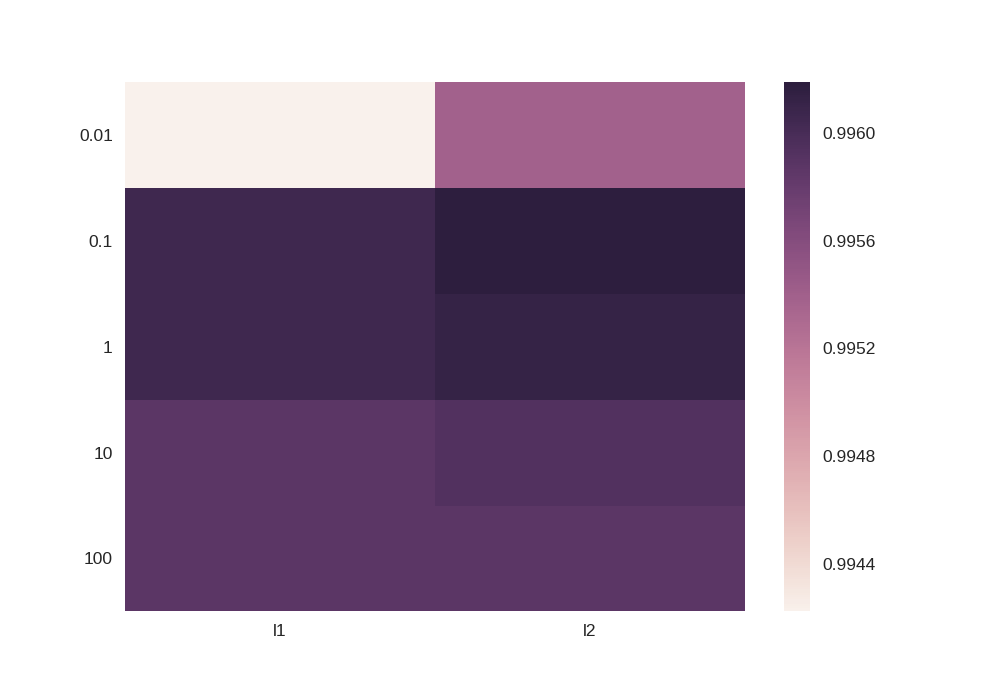

In [68]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    #%matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())